<a href="https://colab.research.google.com/github/Sriharshitha842/ML_LAB/blob/main/ML_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [30]:
#importing test and train datasets as csv files
test = pd.read_csv('/content/sample_data/test.csv')
train = pd.read_csv('/content/sample_data/train.csv')

In [31]:
print(test)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject          Activity
0              0.257178          -0.023285  ...        2          STANDING
1              0.286027          -0.013163  ...        2          STANDING
2              0.275485          -0.026050  ...        2          STANDING
3              0.270298          -0.032614  ...        2          STANDING
4              0.274833          -0.027848  ...        2          STANDING
...                 ...                ...  ...      ...               ...
2942           0.310155          -0.053391  ...       24  WALKING_UPSTAIRS
2943           0.363385          -0.039214  ...       24  WALKING_UPSTAIRS
2944           0.349966           0.030077  ...       24  WALKING_UPSTAIRS
2945           0.237594           0.018467  ...       24  WALKING_UPSTAIRS
2946           0.153627          -0.018437  ...       24  WALKING_UPSTAIRS

[2947 rows x 563 columns]


In [32]:
print(train)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject          Activity
0              0.288585          -0.020294  ...        1          STANDING
1              0.278419          -0.016411  ...        1          STANDING
2              0.279653          -0.019467  ...        1          STANDING
3              0.279174          -0.026201  ...        1          STANDING
4              0.276629          -0.016570  ...        1          STANDING
...                 ...                ...  ...      ...               ...
7347           0.299665          -0.057193  ...       30  WALKING_UPSTAIRS
7348           0.273853          -0.007749  ...       30  WALKING_UPSTAIRS
7349           0.273387          -0.017011  ...       30  WALKING_UPSTAIRS
7350           0.289654          -0.018843  ...       30  WALKING_UPSTAIRS
7351           0.351503          -0.012423  ...       30  WALKING_UPSTAIRS

[7352 rows x 563 columns]


In [33]:
#frequency distribution of the outcome
train_outcome = pd.crosstab(index=train["Activity"], columns="count") 
print(train_outcome)

col_0               count
Activity                 
LAYING               1407
SITTING              1286
STANDING             1374
WALKING              1226
WALKING_DOWNSTAIRS    986
WALKING_UPSTAIRS     1073


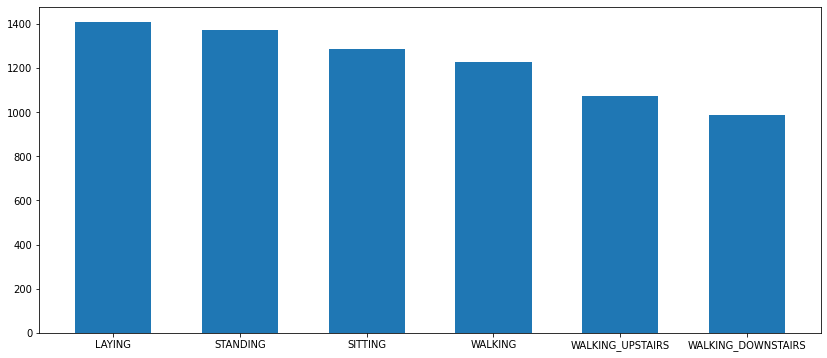

In [34]:
#visualizing outcome distribution
temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
labels = df['labels']
sizes = df['values']
x_pos = [i for i, _ in enumerate(labels)]
plt.figure(1, [14, 6])
plt.bar(x_pos, sizes,width=0.6)
plt.xticks(x_pos, labels)
plt.show()

In [35]:
#normalize the feature set for SVM training

# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)
# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)
# encoding test labels
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)
#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
names_of_predictors = list(X_train.columns.values)
# Scaling the Train and Test feature set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Number of numeric features: 561


In [36]:
#training svm model using linear kernel
final_model = SVC(kernel='linear', random_state=0)
final_model.fit(X_train_scaled, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [41]:
#confusion matrix and accuracy score
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))
print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing set score for SVM: %f" % final_model.score(X_test_scaled , Y_test ))

[[537   0   0   0   0   0]
 [  2 433  55   0   0   1]
 [  0  18 514   0   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   6 399  15]
 [  0   0   0  16   2 453]]


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.97      0.96      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Training set score for SVM: 0.996872
Testing set score for SVM: 0.960638


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):

 #This function prints and plots the confusion matrix.
 #Normalization can be applied by setting `normalize=True`.
 
   if not title:
     if normalize:
       title = 'Normalized confusion matrix'
     else:
       title = 'Confusion matrix, without normalization'
      # Compute confusion matrix
   cm = confusion_matrix(y_true, y_pred)

   # Only use the labels that appear in the data
   classes = unique_labels(y_true, y_pred)
   if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
   else:
      print('Confusion matrix, without normalization')
   print(cm)
   fig, ax = plt.subplots(figsize=(10, 10))
   im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
   ax.figure.colorbar(im, ax=ax)
   ax.set(xticks=np.arange(cm.shape[1]),
   yticks=np.arange(cm.shape[0]),
   xticklabels=classes, yticklabels=classes,
   title=title,
   ylabel='True label',
   xlabel='Predicted label')
   # Rotate the tick labels and set their alignment.
   plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
   # Loop over data dimensions and create text annotations.
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
   fig.tight_layout()
   return ax


Confusion matrix, without normalization
[[537   0   0   0   0   0]
 [  2 433  55   0   0   1]
 [  0  18 514   0   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   6 399  15]
 [  0   0   0  16   2 453]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.   0.88 0.11 0.   0.   0.  ]
 [0.   0.03 0.97 0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.01 0.95 0.04]
 [0.   0.   0.   0.03 0.   0.96]]


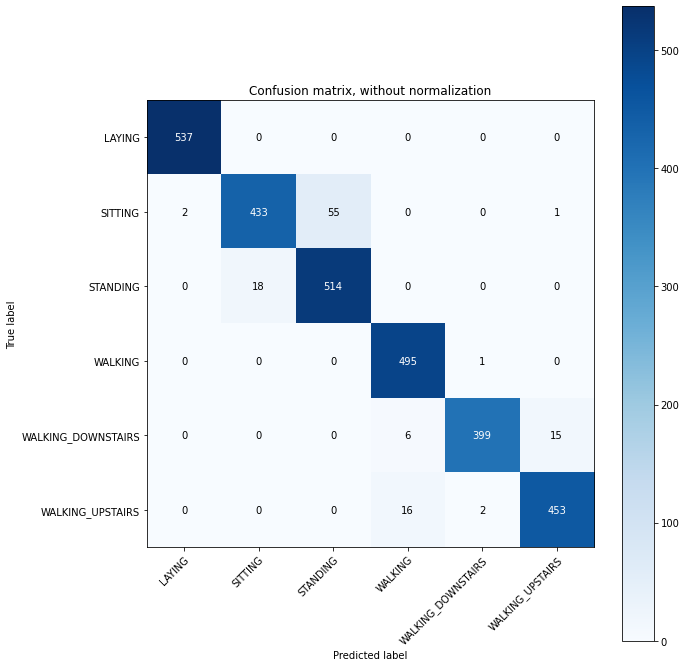

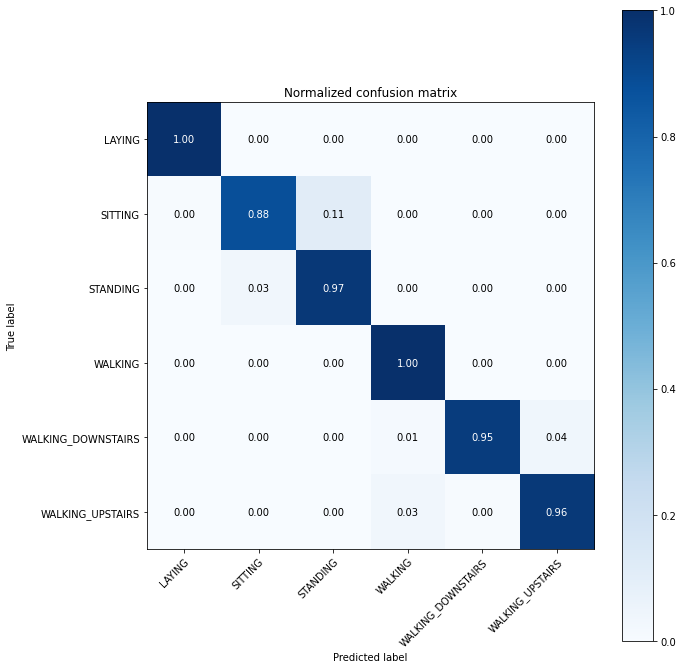

In [44]:
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test_label, Y_pred_label, classes=labels,
 title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(Y_test_label, Y_pred_label, classes=labels, normalize=True,
 title='Normalized confusion matrix')
plt.show()